## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Cristian
- Apellido: Perez Maturana
- Legajo: 147903-9

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# Lectura de dataset
df_diab = pd.read_csv(r'D:\CPM\Ciencia de datos\Directorio\TP 1\ClusterAI_TP_dataset_diabetes.csv')

In [3]:
# se visualizan 5 filas de ejemplo del dataset con todas sus variables
df_diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [4]:
# comando .shape de numpy para traer cantidad de (samples, features)
np.shape(df_diab)

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información

In [6]:
# se observan los tipos de dato en la columna Dtype, y la cuenta de valores no nulos para cada variable,
# y siendo que los 768 contados de cada caso coincide con las 768 filas del dataframe => no hay nulos
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

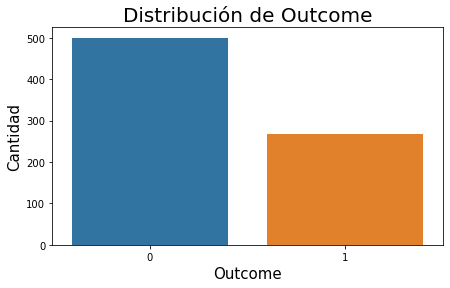

In [7]:
# Se define tamaño del gráfico
plt.figure(figsize=(7,4))
# se indica tipo de gráfico countplot segun variable Outcome
sns.countplot(data=df_diab, x='Outcome')
# se define tamaño de etiqueta eje x
plt.xlabel("Outcome",size = 15)
# tamaño de etiqueta eje y
plt.ylabel("Cantidad",size = 15)
# leyenda de título y tamaño de fuente
plt.title('Distribución de Outcome',size = 20)
# se visualiza gráfico
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [8]:
# .describe() para obtener métricas estadísticas descriptivas de las variables numéricas del dataset
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

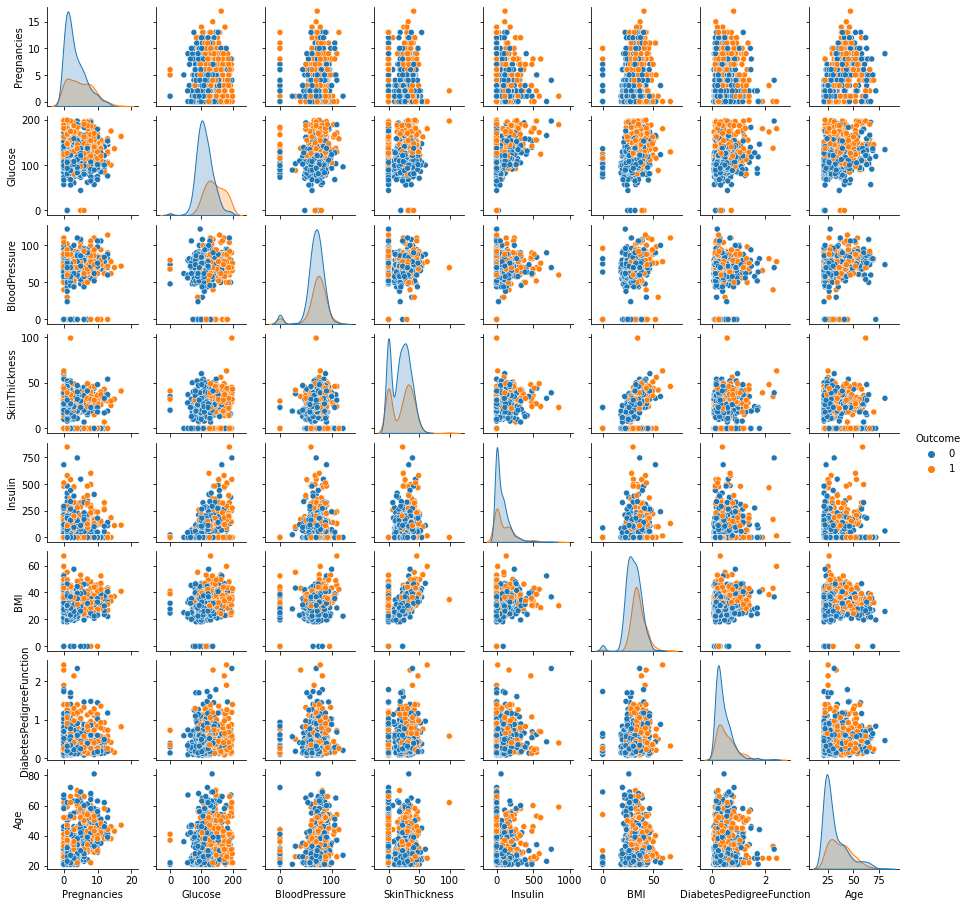

In [9]:
# se crea pairplot en seaborn pasandole dataframe, segmentación por color según variable Outcome, y tamaño del gráfico.
sns.pairplot(data=df_diab, hue='Outcome', height=1.6)
# se visualiza el plot
plt.show()

In [10]:
# Se puede ver una concentración de personas diabéticas en los rangos más elevados de glucosa
# (versus cualquiera de las otras variables),
# y que las curvas de distribución del SkinThickness se asemejan a una forma bimodal tanto para Outcome 1 como 0.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

<AxesSubplot:title={'center':'Heatmap de correlaciones lineales'}>

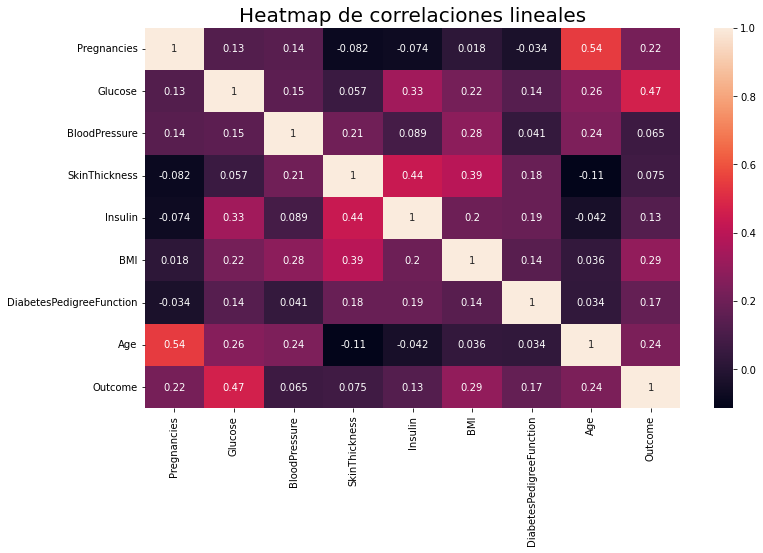

In [4]:
# Se crea y guarda matriz de correlación en variable 'diab_corr'
diab_corr = df_diab.corr()
# se define tamaño de gráfico
plt.figure(figsize=(12,7))
# leyenda del título y tamaño de fuente
plt.title('Heatmap de correlaciones lineales', size = 20)
# se visualiza heatmap de la matriz de correlación y con annot sus valores
sns.heatmap(diab_corr, annot=True)

In [5]:
# Las variables más directamente correlacionados son Age-Pregnancies y Glucose-Outcome, 
# con 0.54 y 0.47 respectivamente de correlación lineal, que resultan relativamente bajas,
# y con las que a priori no se podría establecer mucha relación lineal ni usarlas para tomar decisiones.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

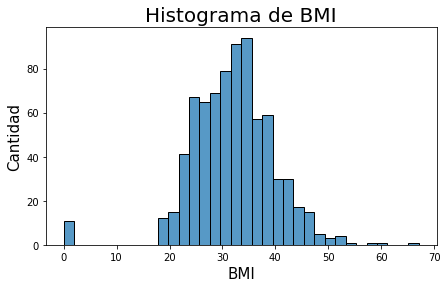

In [6]:
# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea histograma de librería seaborn, indicando por variable 'BMI'
sns.histplot(data=df_diab, x='BMI')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("BMI", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# leyenda del título y tamaño de fuente
plt.title('Histograma de BMI', size = 20)
# se visualiza gráfico
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

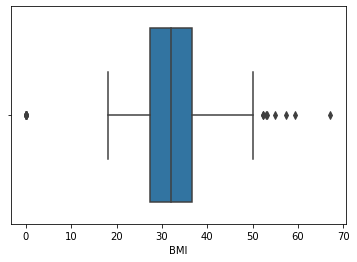

In [7]:
# se crea boxplot de seaborn por variable 'BMI'
sns.boxplot(x = "BMI", data = df_diab)
# se visualiza gráfico
plt.show()

In [8]:
# Se observan valores extraños en cero y en mayores aprox a 50

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

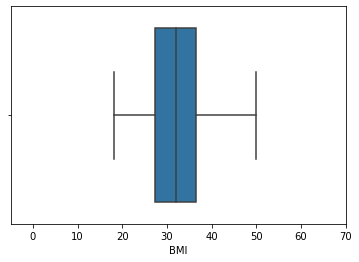

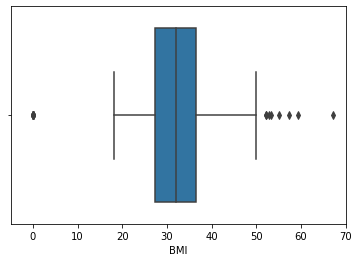

In [9]:
# Se define nuevo dataframe excluyendo samples con valor de BMI menor al cuantil 0.01, y mayor al 0.99
diab_BMI = df_diab.loc[(df_diab['BMI'] > np.quantile(df_diab['BMI'], 0.01)) &
                         (df_diab['BMI'] < np.quantile(df_diab['BMI'], 0.99))]

# se crea boxplot con el nuevo dataframe según variable 'BMI'
sns.boxplot(x = "BMI", data = diab_BMI)
# se definen limites del eje x para comparar luego los dataframes con y sin outliers
plt.xlim(-5,70)
# se visualiza plot
plt.show()

# y se compara a continuación contra el boxplot inicial
sns.boxplot(x = "BMI", data = df_diab)
# se definen mismos limites del eje x para comparar los dataframes con y sin outliers
plt.xlim(-5,70)
# se visualiza plot
plt.show()

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

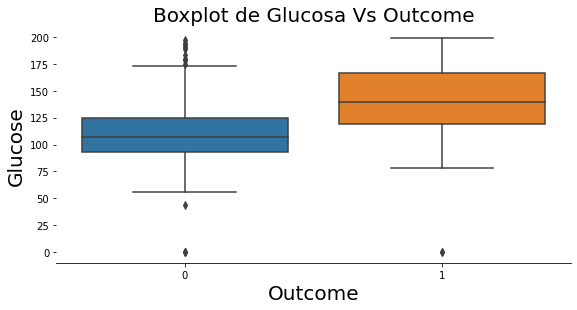

In [10]:
# Se crean boxplots de Glucosa según Outcome y se definen dimensiones del gráfico
g = sns.catplot(data=df_diab,
                x="Outcome",y="Glucose", 
                kind="box",
                height = 4 ,aspect=2)

# se quita línea del eje Y del plot
g.despine(left=True) 

# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("Outcome",size = 20)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Glucose",size = 20)
# leyenda del título y tamaño de fuente
plt.title('Boxplot de Glucosa Vs Outcome',size = 20)
# se visualiza gráfico
plt.show()

In [19]:
# Se puede observar una mediana de glucosa aprox un 25% mayor en pacientes diabéticos respecto a no diabéticos,
# un IQR de casi el doble en pacientes diabéticos respecto a no diabéticos,
# y también que la mayoría de sus valores están dentro de distintos intervalos, los rangos de los IQR apenas se superponen.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

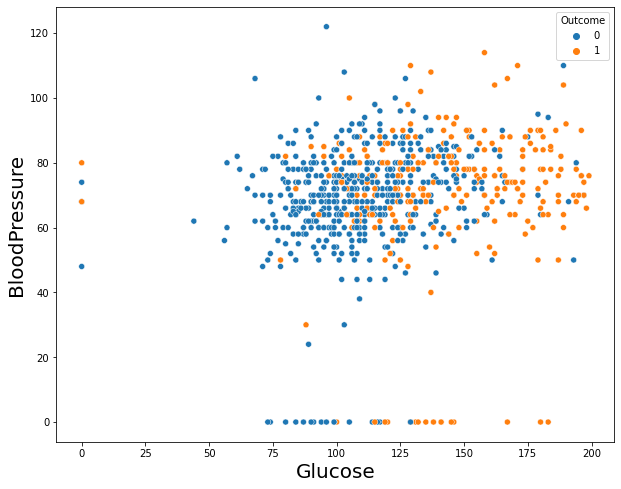

In [20]:
# Se define tamaño de gráfico
plt.figure(figsize=(10,8))
# se crea scatterplot de seaborn por variables Glucosa y Presión sanguínea, y códigos de color por Outcome
sns.scatterplot(x=df_diab.Glucose,y=df_diab.BloodPressure,
                hue=df_diab.Outcome)
#  se define leyenda de eje x y tamaño de fuente
plt.xlabel("Glucose",fontsize=20)
#  se define leyenda y tamaño de fuente de eje y
plt.ylabel("BloodPressure",fontsize=20)
# se visualiza plot
plt.show()

In [21]:
# No se logra ver una relación muy marcada entre Glucosa y Presión sanguínea, 
# solo se vuelve a notar mayor concentración de personas diabéticas en los rangos más elevados de glucosa,
# y que los valores de Presión sanguínea para ambos casos se encuentra mayormente dentro del rango entre 50 y 90,
# quizás algo más concentrado entre 60 y 80 para No diabéticos, cuando en pacientes diabéticos se ve una mayor dispersión.

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [30]:
# Se crea nueva columna 'Rango etareo' y categoría '1er rango' para edades menores a 30 años
df_diab.loc[(df_diab['Age'] < 30), 'Rango etareo'] = '1er rango'
# se crea categoría '2do rango' en columna 'Rango etareo' para edades entre 30 y 40 años
df_diab.loc[(df_diab['Age'] >= 30) & (df_diab['Age'] <= 40), 'Rango etareo'] = '2do rango'
# se crea categoría '3er rango' en columna 'Rango etareo' para edades mayores a 40 años
df_diab.loc[(df_diab['Age'] > 40), 'Rango etareo']  = '3er rango'
# se visualizan 5 filas de ejemplo del nuevo dataframe para corroborar modificaciones hechas
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango etareo
0,6,148,72,35,0,33.6,0.627,50,1,3er rango
1,1,85,66,29,0,26.6,0.351,31,0,2do rango
2,8,183,64,0,0,23.3,0.672,32,1,2do rango
3,1,89,66,23,94,28.1,0.167,21,0,1er rango
4,0,137,40,35,168,43.1,2.288,33,1,2do rango


In [31]:
# se verifican dimensiones del dataframe 
np.shape(df_diab)

(768, 10)

In [32]:
# se creó OK una columna nueva al df original, con la categorización establecida

##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

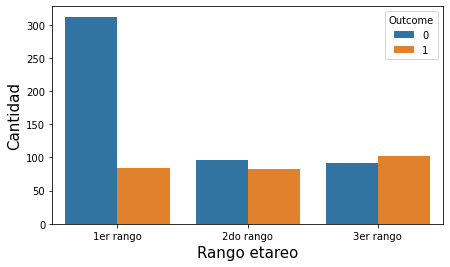

In [37]:
# Se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea countplot según Rango etareo discriminado por Outcome, y se define orden de menor a mayor Rango etareo
sns.countplot(data=df_diab, x='Rango etareo', hue="Outcome",
            order=['1er rango','2do rango','3er rango'])
# se define leyenda y tamaño de fuente del eje x
plt.xlabel("Rango etareo",size = 15)
# se define leyenda y tamaño de fuente del eje y
plt.ylabel("Cantidad",size = 15)
# se visualiza plot
plt.show()

In [ ]:
# La cant de pacientes no diabéticos en el dataset dentro del primer rango etareo es 3 veces mayor a la de pacientes diabéticos,
# valor que cae hasta casi emparejarse con las cantidades del segundo y tercer rango.
# Se observa también que conforme aumenta el rango etareo, aumenta también la cantidad de pacientes diabéticos.